In [81]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from numpy import load
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
import sys
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator


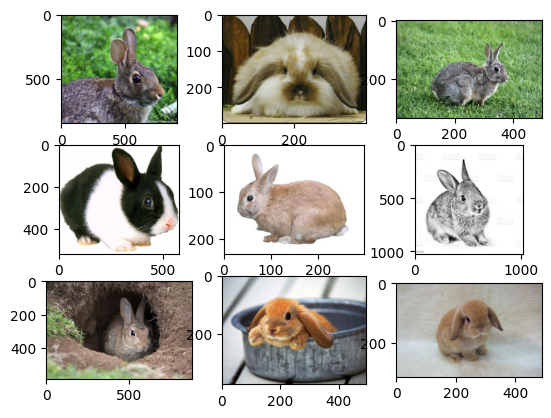

In [82]:
# define location of dataset
folder = 'Dataset/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'Rabbit.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

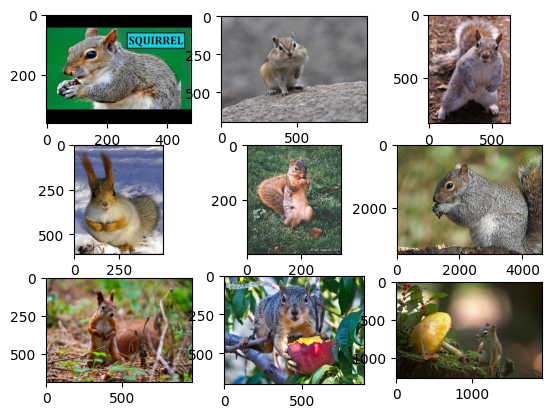

In [83]:
# define location of dataset
folder = 'Dataset/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'Squirrel.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [84]:
# Location of dataset

loc = 'Dataset/'

photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(loc):
 # determine class
 output = 0.0
 if file.startswith('Rabbit'):
 	output = 1.0
 # load image
 photo = load_img(loc + file, target_size=(200, 200))
 # convert to numpy array
 photo = img_to_array(photo)
 # store
 photos.append(photo)
 labels.append(output)

# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('Rabbit_vs_Squirrel_photos.npy', photos)
save('Rabbit_vs_Squirrel_labels.npy', labels)

(200, 200, 200, 3) (200,)


In [85]:
photos = load('Rabbit_vs_Squirrel_photos.npy')
labels = load('Rabbit_vs_Squirrel_labels.npy')

# 200 images of 200 * 200 * 3
# 200 images labels

print(photos.shape)
print(labels.shape)

(200, 200, 200, 3)
(200,)


In [86]:
print(labels[0:100])


[1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1.]


In [87]:
# create directories
dataset_home = 'dataset_Rabbit_vs_Squirrel/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['Rabbit/', 'Squirrel/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.2
# copy training dataset images into subdirectories
src_directory = 'Dataset/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('Rabbit'):
		dst = dataset_home + dst_dir + 'Rabbit/'  + file
		copyfile(src, dst)
	elif file.startswith('Squirrel'):
		dst = dataset_home + dst_dir + 'Squirrel/'  + file
		copyfile(src, dst)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


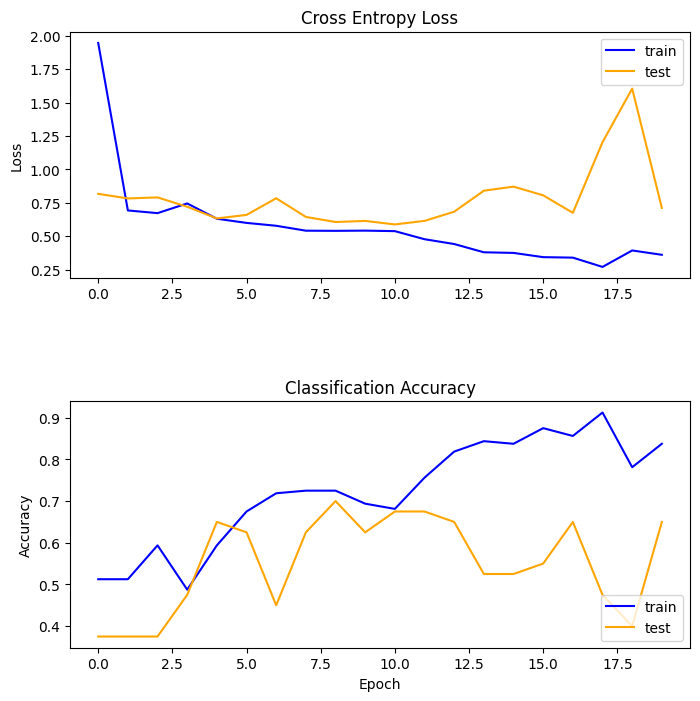

> 65.000


In [88]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))

	# VGG 3
	# model = Sequential()
	# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	# model.add(MaxPooling2D((2, 2)))
	# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	# model.add(MaxPooling2D((2, 2)))
	# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	# model.add(MaxPooling2D((2, 2)))
	# model.add(Flatten())
	# model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	# model.add(Dense(1, activation='sigmoid'))

	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # create figure and axes objects
    fig, axs = plt.subplots(2, 1, figsize=(8, 8))
    plt.subplots_adjust(hspace=0.5)

    # plot loss
    axs[0].set_title('Cross Entropy Loss')
    axs[0].plot(history.history['loss'], color='blue', label='train')
    axs[0].plot(history.history['val_loss'], color='orange', label='test')
    axs[0].set_ylabel('Loss')
    axs[0].legend(loc='upper right')

    # plot accuracy
    axs[1].set_title('Classification Accuracy')
    axs[1].plot(history.history['accuracy'], color='blue', label='train')
    axs[1].plot(history.history['val_accuracy'], color='orange', label='test')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend(loc='lower right')

    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_plot.png')
    plt.show()

# run the test harness for evaluating a model
# def run_test_harness(model):


	# learning curves

	# predictions = model.predict(test_it, steps=len(test_it), verbose=0)
	# print(predictions)
# entry point, run the test harness
model = define_model()
# run_test_harness(model)
	# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare iterators
train_it = datagen.flow_from_directory('dataset_Rabbit_vs_Squirrel/train/',
	class_mode='binary', target_size=(200, 200))
test_it = datagen.flow_from_directory('dataset_Rabbit_vs_Squirrel/test/',
	class_mode='binary', target_size=(200, 200))
# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it),
	validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
# evaluate model

summarize_diagnostics(history)

_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))




In [89]:
# Predict for images in test folder

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(200, 200))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 200, 200, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image('dataset_Rabbit_vs_Squirrel/test/Rabbit/Rabbit.67.jpg')
	# load model
	# predict the class
	result = model.predict(img)
	print(result[0])
# entry point, run the example
run_example()

1/1 [==============================] - 0s 109ms/step
[1.]


In [98]:
import os
import pandas as pd

def run_example():
    # get a list of all image files in the test directory and its subdirectories
    img_folder = 'dataset_Rabbit_vs_Squirrel/test'
    img_files = []
    true_labels = []
    for root, dirs, files in os.walk(img_folder):
        for file in files:
            if file.endswith('.jpg'):
                img_files.append(os.path.join(root, file))
                if file.startswith('Rabbit'):
                    true_labels.append(1)
                else:
                    true_labels.append(0)

    # load the model
    # model = load_model('my_model.h5')

    # make predictions for each image and store the predicted and true labels
    predicted_labels = []
    image_names = []
    images = []
    for i, img_file in enumerate(img_files):
        img = load_image(img_file)
        result = model.predict(img)
        predicted_label = round(result[0][0])
        predicted_labels.append(predicted_label)
        image_names.append(os.path.basename(img_file))
        images.append(img)
        # print the predicted and true label for each image
        print(f"Image: {img_file}")
        print(f"Predicted Label: {predicted_label}, True Label: {true_labels[i]}")
        print("---------------")

    # create a pandas dataframe to display the predicted and true labels side by side
    df = pd.DataFrame({'Image Name': image_names, 'Predicted Label': predicted_labels, 'True Label': true_labels})

    # display the dataframe
    print(df)

    # find images with wrong predictions and display them
    for i, img_file in enumerate(img_files):
        if predicted_labels[i] != true_labels[i]:
            print(f"Image: {img_file}")
            # Show the image
            plt.imshow(images[i][0])
            plt.title(f"Predicted Label: {predicted_labels[i]}, True Label: {true_labels[i]}")
            plt.show()


1/1 [==============================] - 0s 36ms/step
Image: dataset_Rabbit_vs_Squirrel/test/Rabbit/Rabbit.8.jpg
Predicted Label: 1, True Label: 1
---------------
1/1 [==============================] - 0s 22ms/step
Image: dataset_Rabbit_vs_Squirrel/test/Rabbit/Rabbit.31.jpg
Predicted Label: 0, True Label: 1
---------------
1/1 [==============================] - 0s 20ms/step
Image: dataset_Rabbit_vs_Squirrel/test/Rabbit/Rabbit.34.jpg
Predicted Label: 0, True Label: 1
---------------
1/1 [==============================] - 0s 38ms/step
Image: dataset_Rabbit_vs_Squirrel/test/Rabbit/Rabbit.50.jpg
Predicted Label: 0, True Label: 1
---------------
1/1 [==============================] - 0s 33ms/step
Image: dataset_Rabbit_vs_Squirrel/test/Rabbit/Rabbit.82.jpg
Predicted Label: 0, True Label: 1
---------------
1/1 [==============================] - 0s 23ms/step
Image: dataset_Rabbit_vs_Squirrel/test/Rabbit/Rabbit.83.jpg
Predicted Label: 1, True Label: 1
---------------
1/1 [========================

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


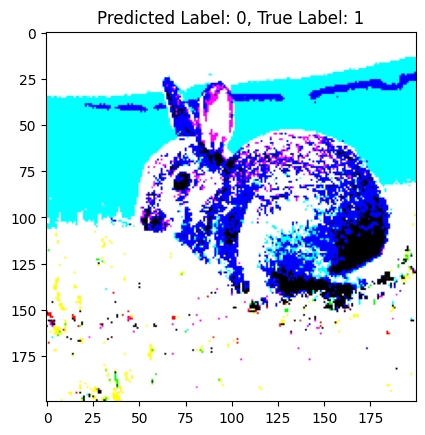

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Rabbit/Rabbit.34.jpg


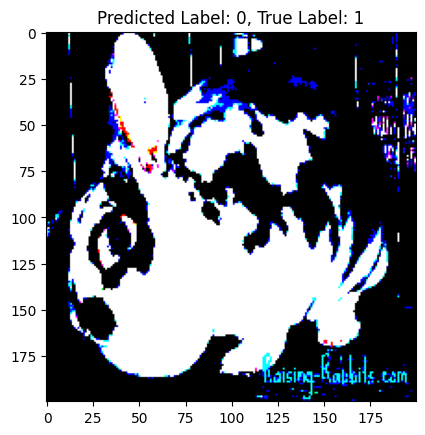

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Rabbit/Rabbit.50.jpg


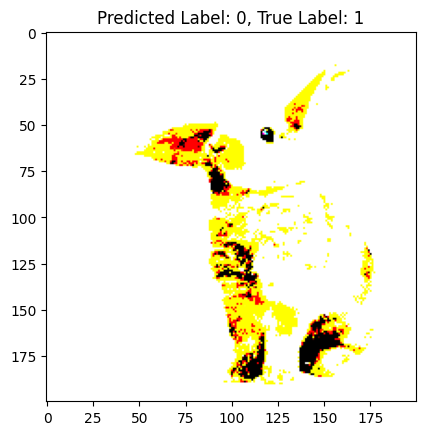

Image: dataset_Rabbit_vs_Squirrel/test/Rabbit/Rabbit.82.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


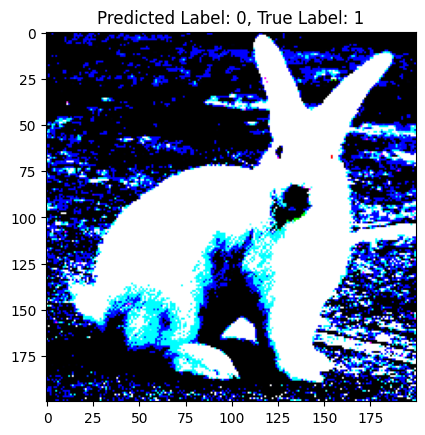

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Rabbit/Rabbit.63.jpg


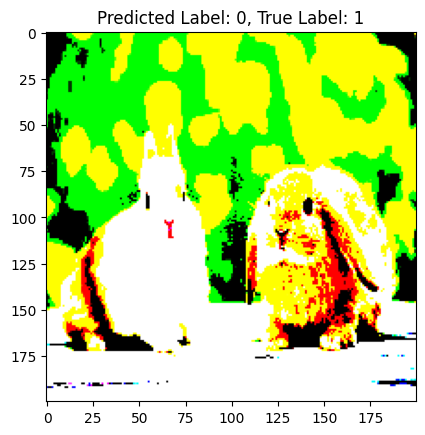

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Rabbit/Rabbit.88.jpg


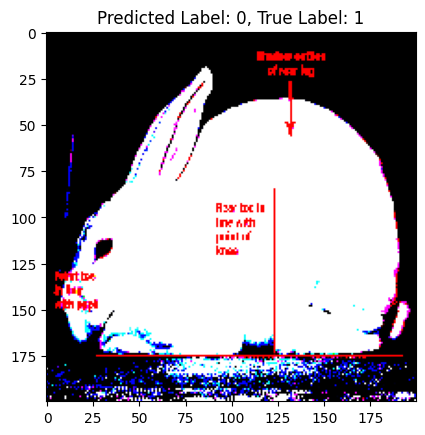

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Rabbit/Rabbit.38.jpg


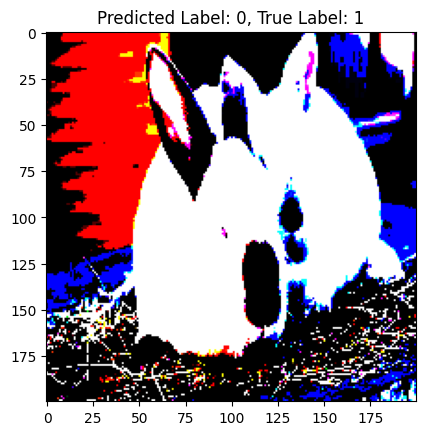

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.19.jpg


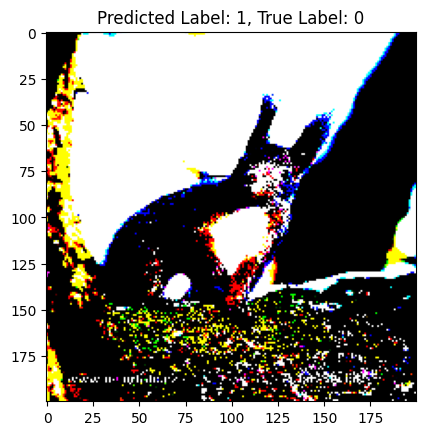

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.25.jpg


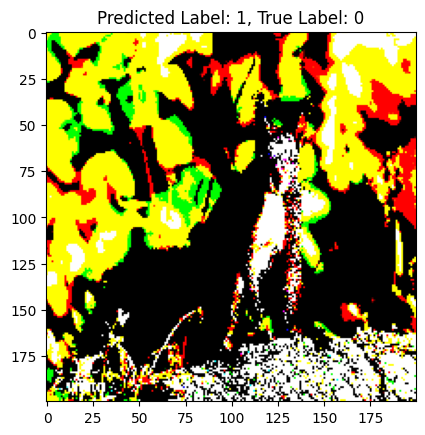

Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.33.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


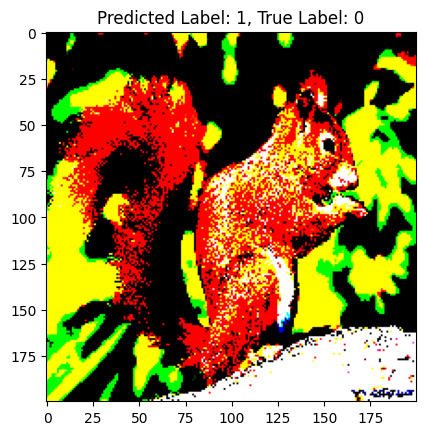

Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.32.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


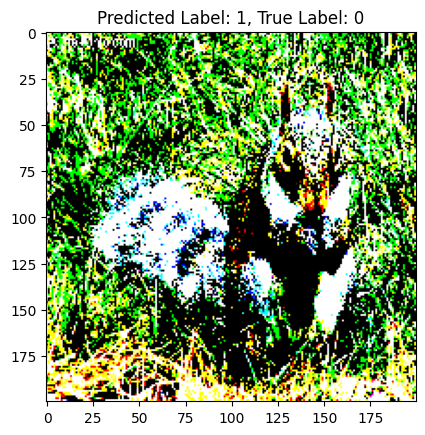

Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.20.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


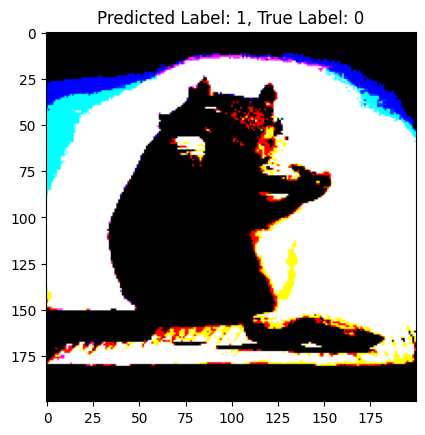

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.53.jpg


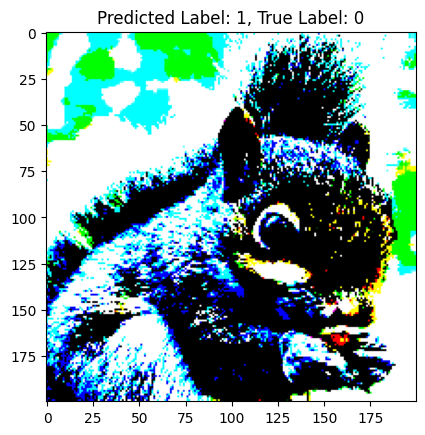

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.91.jpg


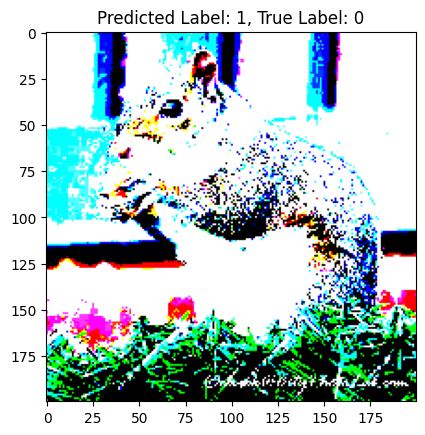

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.50.jpg


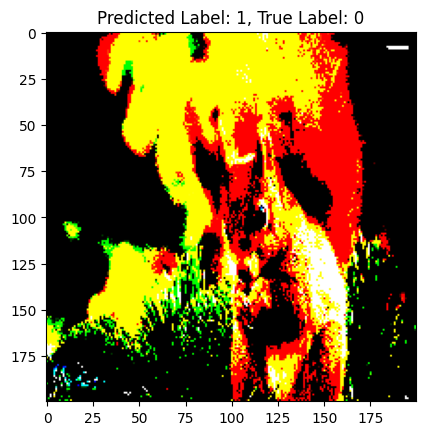

Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.51.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


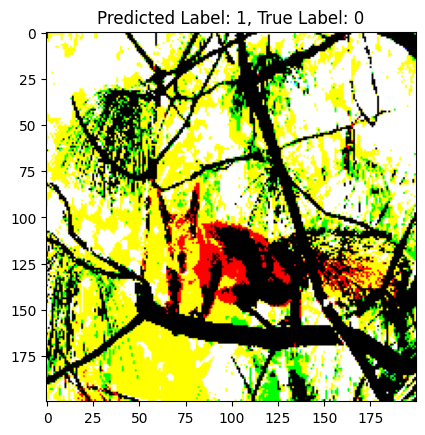

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.69.jpg


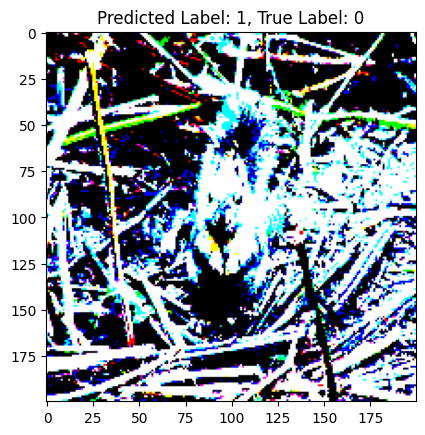

Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.97.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


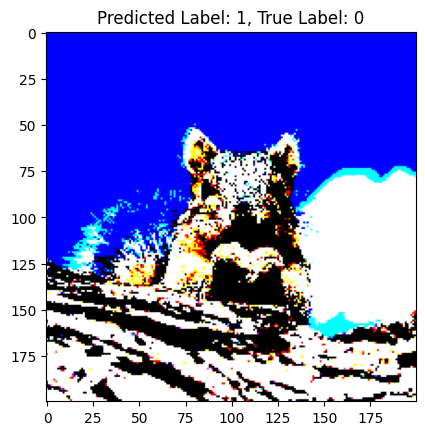

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.72.jpg


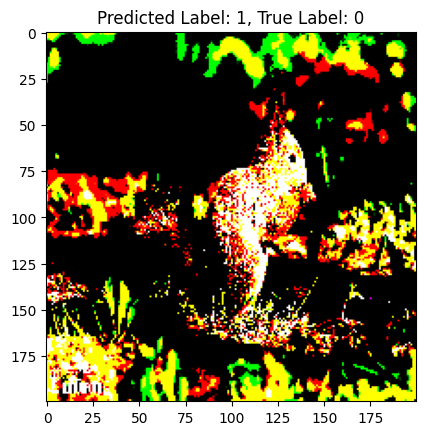

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.73.jpg


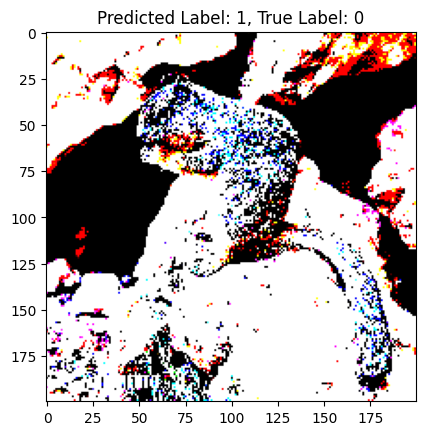

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.98.jpg


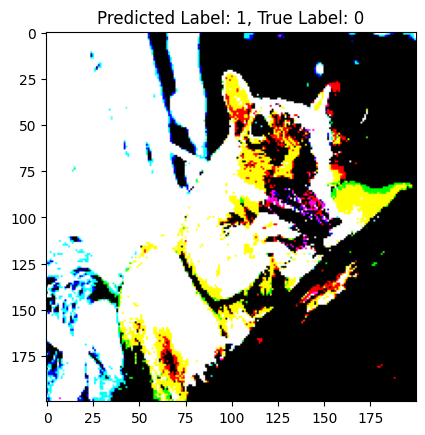

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.65.jpg


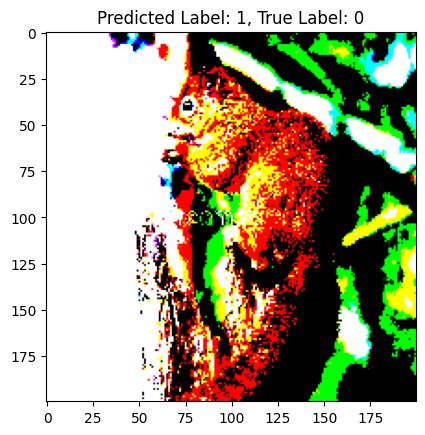

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.2.jpg


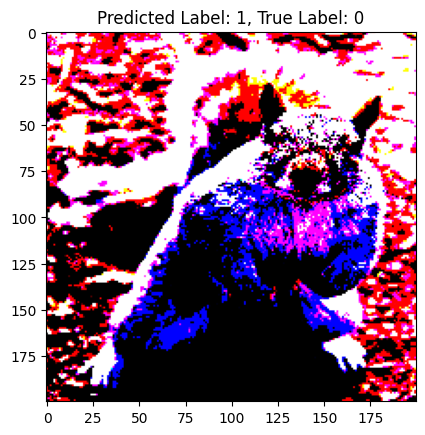

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.60.jpg


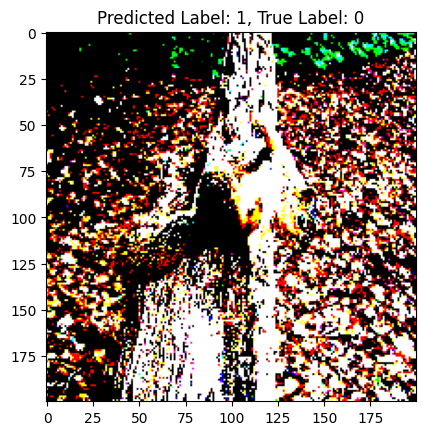

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.75.jpg


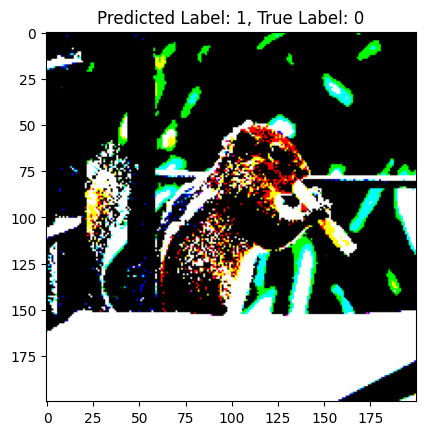

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.49.jpg


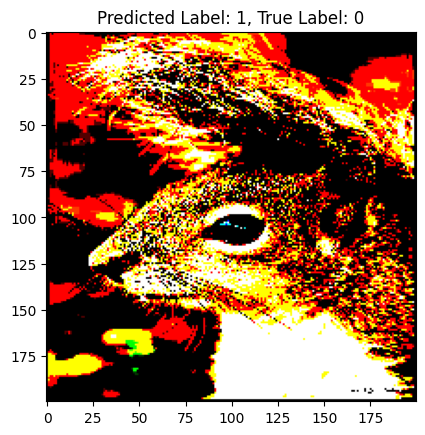

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.77.jpg


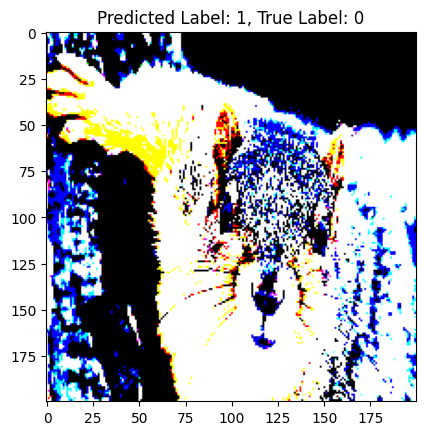

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.11.jpg


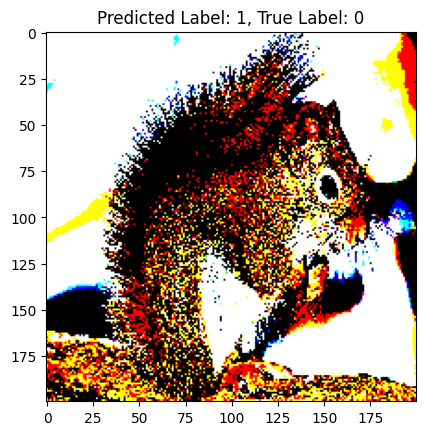

Image: dataset_Rabbit_vs_Squirrel/test/Squirrel/Squirrel.13.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


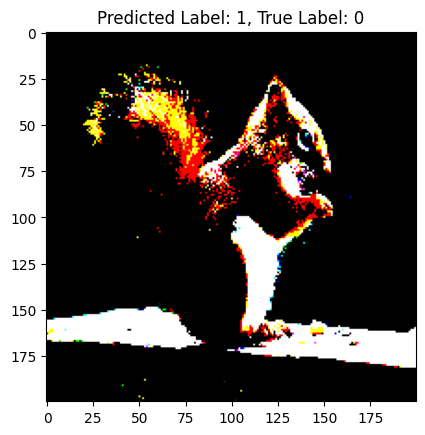

In [99]:
run_example()

In [92]:
# Predict for images in test folder
# load and prepare the image

NameError: name 'df' is not defined